<a href="https://colab.research.google.com/github/Ether-silicon/OAS5033_Big_Data_Analytics/blob/main/Activity_5_Predictive_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OAS5033: Big Data Analytics - Activity 5 Predictive Modelling
* Prepared by: Teh Yoong Sin 24002133
* Date: 2/11/2024
* Dataset: Weather dataset https://www.kaggle.com/datasets/zaraavagyan/weathercsv

## Weather prediction machine learning model development
---

## 1.0 Import libraries and dataset

In [46]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Import dataset
df = pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
df.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No
365,12.3,30.2,0.0,6.0,12.6,NW,78.0,NW,WNW,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,No,0.0,No


## 2.0 Exploratory Data Analysis (EDA)

In [5]:
df.shape

(366, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [7]:
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


In [8]:
df.isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [10]:
df.duplicated().sum()

0

### Categorical feature

In [12]:
cotegory_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
cotegory_feature

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

### Numerical feature

In [13]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

## 3.0 Data Visualization

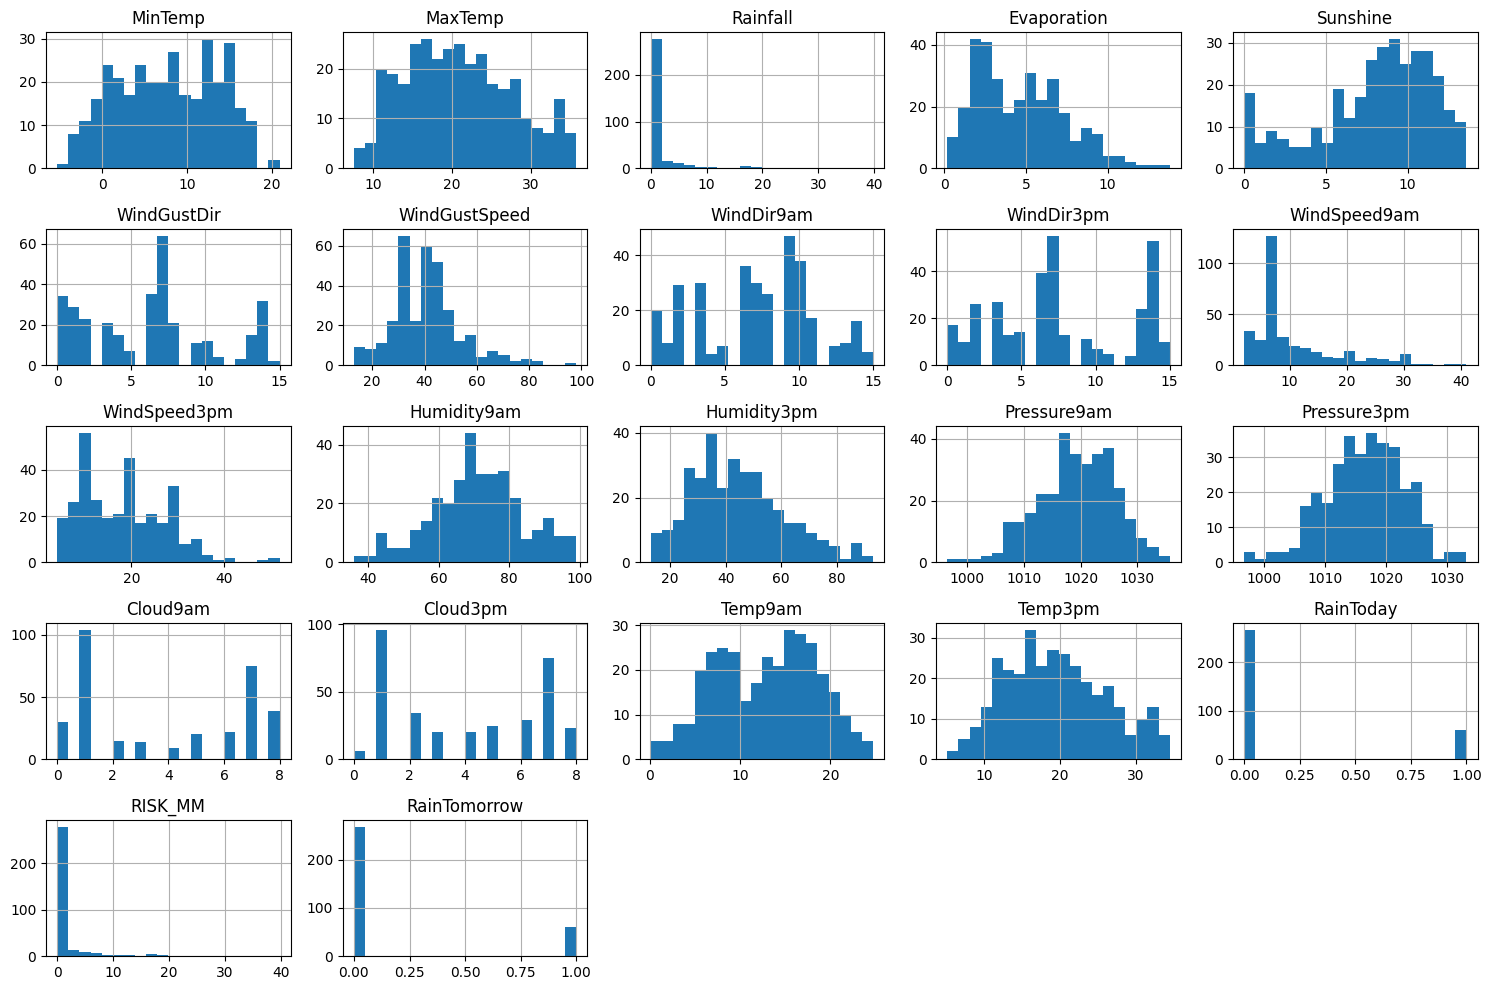

In [50]:
# Histograms for numerical features
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


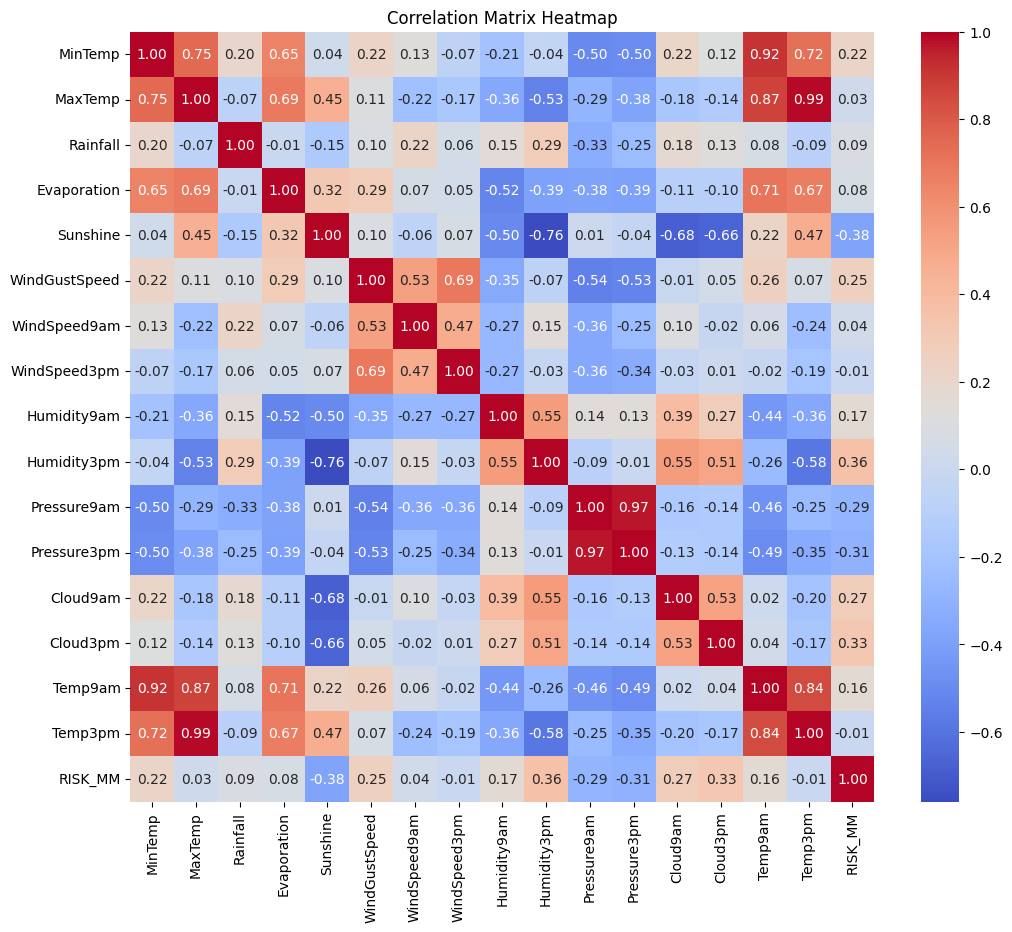

In [17]:
# Remove rows with 'object' data type
df_numeric = df.select_dtypes(exclude=['object'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

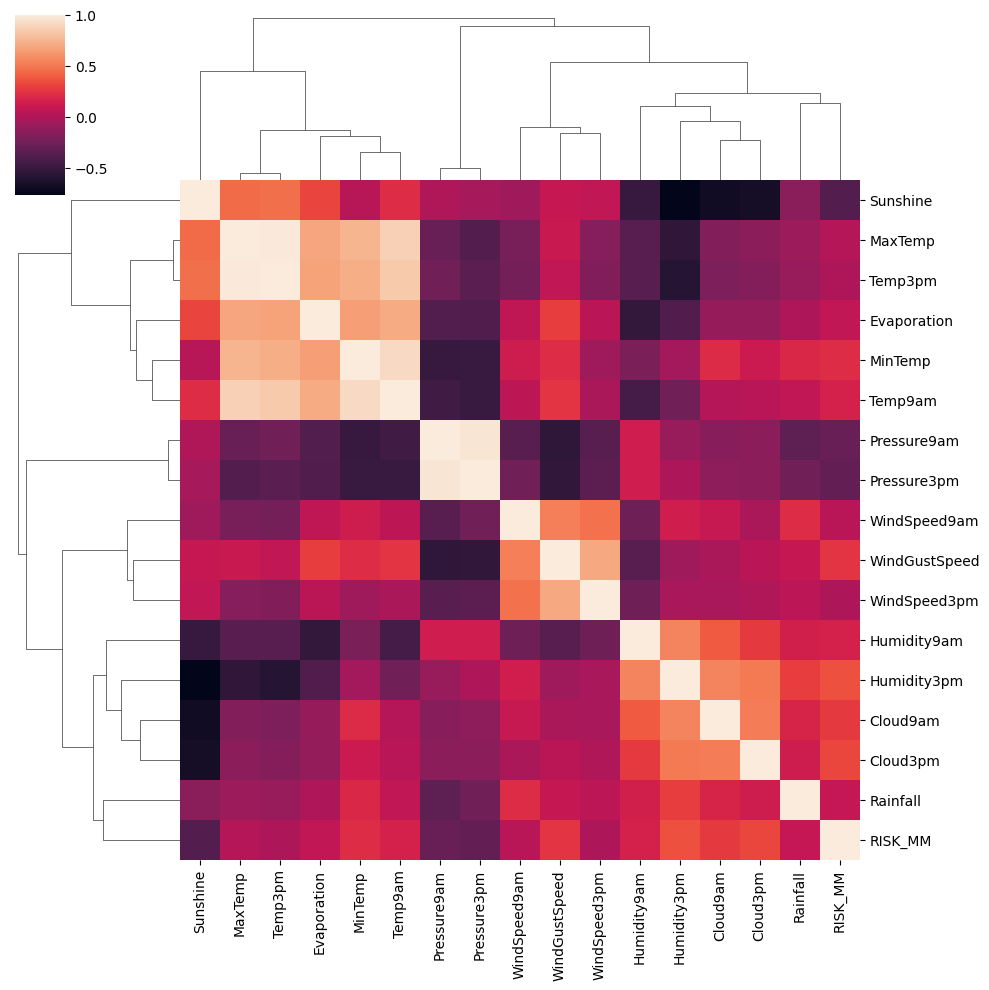

In [18]:
sns.clustermap(corr_matrix)

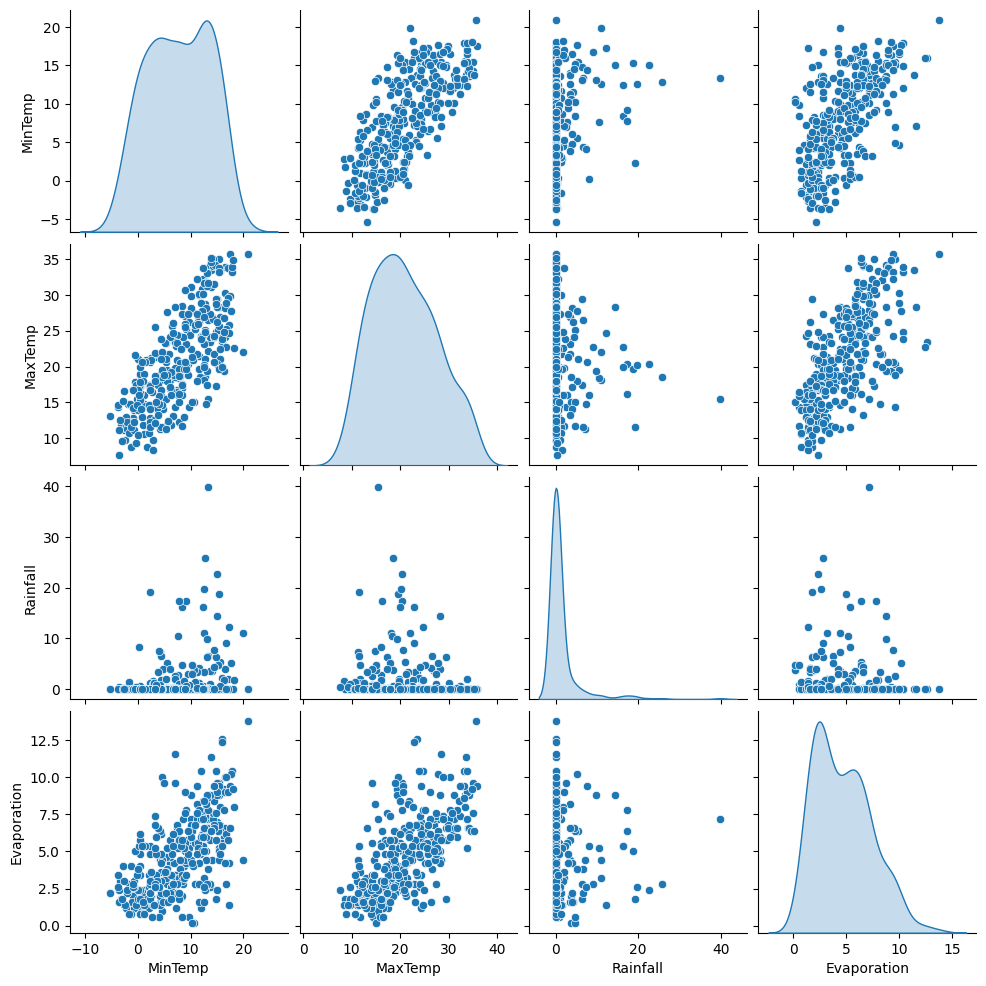

In [52]:
# Pairplot for selected numerical features
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']], diag_kind='kde')
plt.show()

## 4.0 Data Cleaning

### Handle missing data

In [20]:
df.dropna(inplace=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [23]:
cotegory_feature

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in cotegory_feature:
    df[feature] = le.fit_transform(df[feature])

df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,6,76.0,10,7,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0,0
362,7.1,28.4,0.0,11.6,12.7,3,48.0,6,6,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0,0
363,12.5,19.9,0.0,8.4,5.3,2,43.0,1,1,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0,0
364,12.5,26.9,0.0,5.0,7.1,7,46.0,11,14,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0,0


## 5.0 Feature Engineering

### Feature selection

In [26]:
X = df.drop(['RainTomorrow'], axis=1)
y = df[['RainTomorrow']]

In [27]:
# Use traintestsplit to separate training and testing set witth 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization of the Data

In [30]:
scaler = StandardScaler()

# fit the scaler to the training set, it will learn th parameter
scaler.fit(X_train)

StandardScaler()

### Scalarization of the Data

In [31]:
# transform train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
scaler.fit(X_train_scaled)

X_train_scaled = scaler.transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

In [33]:
X_train_scaled.shape

(262, 21)

## 6.0 Model Development

### Logistic Regression

In [43]:
# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
y_pred = lr.predict(X_test_scaled)

#### Model Evaluation of Logistric Regression

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       1.00      0.70      0.82        10

    accuracy                           0.95        66
   macro avg       0.97      0.85      0.90        66
weighted avg       0.96      0.95      0.95        66



### K Nearest Neighbour

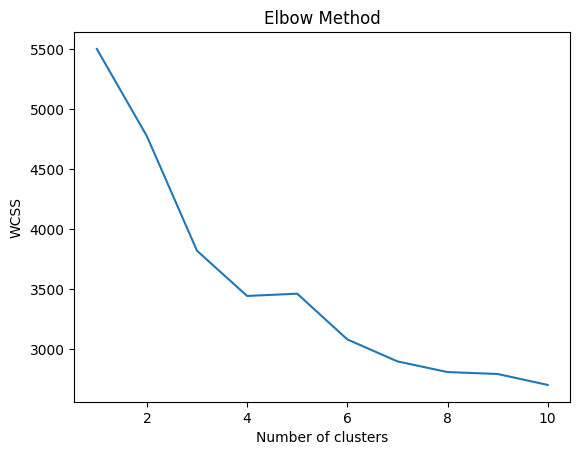

In [41]:
# Determine k value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The obvious elbow effect occurs at k = 4.

In [42]:
# Train K-Neighbour model
neigh = KNeighborsClassifier(n_neighbors=4).fit(X_train_scaled, y_train)
neigh

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [44]:
yhat = neigh.predict(X_test_scaled)
yhat[0:5]

print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train_scaled)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.8702290076335878
Test set Accuracy:  0.8787878787878788


#### Model Evaluation of KNN

In [45]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        56
           1       0.75      0.30      0.43        10

    accuracy                           0.88        66
   macro avg       0.82      0.64      0.68        66
weighted avg       0.87      0.88      0.86        66

